In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 33)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

17

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:806
number of class2:811

 ****** Running generation 0 ****** 

Population's average fitness: 0.51283 stdev: 0.06910
Best fitness: 0.73408 - size: (2, 13) - species 2 - id 138
Average adjusted fitness: 0.203
Mean genetic distance 2.870, standard deviation 0.450
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 4.841 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54241 stdev: 0.07808
Best fitness: 0.80025 - size: (3, 14) - species 22 - id 374
Average adjusted fitness: 0.303
Mean genetic distance 2.964, standard deviation 0.448
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.085 sec (4.963 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56455 stdev: 0.08280
Best fitness: 0.80210 - size: (3, 15) - species 20 - id 411
Average adjusted fitness: 0.267
Mean genetic distance 2.998, standard deviation 0.471
Population of 204 members in 33 species
Total extinct

Population's average fitness: 0.64288 stdev: 0.11110
Best fitness: 0.83983 - size: (9, 27) - species 38 - id 3302
Average adjusted fitness: 0.275
Mean genetic distance 3.152, standard deviation 0.507
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 10.538 sec (7.563 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64705 stdev: 0.10903
Best fitness: 0.83983 - size: (9, 27) - species 38 - id 3302
Average adjusted fitness: 0.296
Mean genetic distance 3.144, standard deviation 0.510
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 9.778 sec (7.680 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64786 stdev: 0.10972
Best fitness: 0.83983 - size: (9, 27) - species 38 - id 3302
Average adjusted fitness: 0.222
Mean genetic distance 3.182, standard deviation 0.528
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 8.081 sec (7.778 average)

 *****

Population's average fitness: 0.63157 stdev: 0.08826
Best fitness: 0.79283 - size: (5, 20) - species 3 - id 1704
Average adjusted fitness: 0.291
Mean genetic distance 3.093, standard deviation 0.459
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 6.566 sec (6.610 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62831 stdev: 0.08537
Best fitness: 0.79283 - size: (5, 20) - species 3 - id 1704
Average adjusted fitness: 0.245
Mean genetic distance 3.115, standard deviation 0.460
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 7.119 sec (6.719 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62080 stdev: 0.09952
Best fitness: 0.79283 - size: (5, 20) - species 3 - id 1704
Average adjusted fitness: 0.245
Mean genetic distance 3.114, standard deviation 0.467
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 6.933 sec (6.749 average)

 ****** Ru

Population's average fitness: 0.58330 stdev: 0.08551
Best fitness: 0.73717 - size: (4, 14) - species 30 - id 723
Average adjusted fitness: 0.222
Mean genetic distance 3.099, standard deviation 0.496
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 8.306 sec (6.865 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59311 stdev: 0.08517
Best fitness: 0.73964 - size: (5, 16) - species 30 - id 1234
Average adjusted fitness: 0.232
Mean genetic distance 3.123, standard deviation 0.472
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 8.148 sec (7.025 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60700 stdev: 0.08813
Best fitness: 0.73964 - size: (5, 16) - species 30 - id 1234
Average adjusted fitness: 0.298
Mean genetic distance 3.117, standard deviation 0.489
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 9.871 sec (7.342 average)

 ****** Ru

Population's average fitness: 0.65028 stdev: 0.09007
Best fitness: 0.81262 - size: (5, 18) - species 23 - id 2421
Average adjusted fitness: 0.354
Mean genetic distance 3.331, standard deviation 0.531
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 8.319 sec (7.999 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64498 stdev: 0.09794
Best fitness: 0.81262 - size: (5, 18) - species 23 - id 2421
Average adjusted fitness: 0.351
Mean genetic distance 3.361, standard deviation 0.530
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.031 sec (8.043 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64549 stdev: 0.09457
Best fitness: 0.81262 - size: (5, 18) - species 23 - id 2421
Average adjusted fitness: 0.208
Mean genetic distance 3.356, standard deviation 0.528
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.265 sec (8.120 average)
number o

Population's average fitness: 0.65195 stdev: 0.11049
Best fitness: 0.81509 - size: (5, 18) - species 44 - id 2124
Average adjusted fitness: 0.330
Mean genetic distance 3.316, standard deviation 0.481
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 8.006 sec (7.931 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64634 stdev: 0.11773
Best fitness: 0.81571 - size: (6, 19) - species 44 - id 3068
Average adjusted fitness: 0.403
Mean genetic distance 3.307, standard deviation 0.485
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 7.881 sec (7.961 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.65295 stdev: 0.10535
Best fitness: 0.81571 - size: (6, 19) - species 44 - id 3068
Average adjusted fitness: 0.357
Mean genetic distance 3.292, standard deviation 0.478
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 7.850 sec (7.971 average)

 ******

Population's average fitness: 0.57475 stdev: 0.07622
Best fitness: 0.71985 - size: (8, 25) - species 7 - id 1956
Average adjusted fitness: 0.221
Mean genetic distance 3.162, standard deviation 0.479
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.870 sec (7.475 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58079 stdev: 0.07489
Best fitness: 0.71985 - size: (8, 25) - species 7 - id 1956
Average adjusted fitness: 0.219
Mean genetic distance 3.157, standard deviation 0.488
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 8.115 sec (7.613 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58211 stdev: 0.07375
Best fitness: 0.71985 - size: (8, 25) - species 7 - id 1956
Average adjusted fitness: 0.225
Mean genetic distance 3.173, standard deviation 0.488
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.872 sec (7.723 average)

 ****** Ru

Total extinctions: 0
Generation time: 6.689 sec (6.229 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.75455 stdev: 0.22655
Best fitness: 0.91713 - size: (5, 19) - species 25 - id 833
Average adjusted fitness: 0.627
Mean genetic distance 2.999, standard deviation 0.484
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 7.069 sec (6.397 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.78583 stdev: 0.20424
Best fitness: 0.93878 - size: (2, 14) - species 9 - id 966
Average adjusted fitness: 0.663
Mean genetic distance 3.029, standard deviation 0.504
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 6.952 sec (6.490 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.79986 stdev: 0.19308
Best fitness: 0.93878 - size: (2, 14) - species 9 - id 966
Average adjusted fitness: 0.680
Mean genetic distance 3.026, standard deviation 0.500
Population of 20

Population of 199 members in 19 species
Total extinctions: 0
Generation time: 8.559 sec (8.425 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.80731 stdev: 0.18812
Best fitness: 0.96104 - size: (7, 23) - species 28 - id 4434
Average adjusted fitness: 0.706
Mean genetic distance 3.130, standard deviation 0.536
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 8.595 sec (8.458 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.79405 stdev: 0.19187
Best fitness: 0.96104 - size: (7, 23) - species 28 - id 4434
Average adjusted fitness: 0.698
Mean genetic distance 3.132, standard deviation 0.570
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 8.518 sec (8.482 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.77091 stdev: 0.22589
Best fitness: 0.96104 - size: (7, 23) - species 28 - id 4434
Average adjusted fitness: 0.667
Mean genetic distance 

Mean genetic distance 3.195, standard deviation 0.518
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 7.735 sec (7.515 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61519 stdev: 0.09101
Best fitness: 0.80767 - size: (5, 19) - species 35 - id 2682
Average adjusted fitness: 0.255
Mean genetic distance 3.162, standard deviation 0.532
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 7.815 sec (7.555 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61521 stdev: 0.09542
Best fitness: 0.80767 - size: (5, 19) - species 35 - id 2682
Average adjusted fitness: 0.362
Mean genetic distance 3.234, standard deviation 0.512
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 7.616 sec (7.562 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.60888 stdev: 0.10261
Best fitness: 0.81200 - size: (6, 21) - species 35 - id 3070


Mean genetic distance 3.153, standard deviation 0.508
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 7.222 sec (6.822 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66931 stdev: 0.14138
Best fitness: 0.83241 - size: (4, 18) - species 13 - id 834
Average adjusted fitness: 0.408
Mean genetic distance 3.214, standard deviation 0.497
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 7.486 sec (6.946 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66862 stdev: 0.14113
Best fitness: 0.83241 - size: (4, 18) - species 13 - id 834
Average adjusted fitness: 0.374
Mean genetic distance 3.229, standard deviation 0.497
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 7.625 sec (7.106 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.67642 stdev: 0.13063
Best fitness: 0.83241 - size: (4, 18) - species 13 - id 834
Ave

Population's average fitness: 0.52763 stdev: 0.08626
Best fitness: 0.70501 - size: (3, 15) - species 4 - id 271
Average adjusted fitness: 0.192
Mean genetic distance 2.951, standard deviation 0.491
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.050 sec (5.898 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54577 stdev: 0.08337
Best fitness: 0.70501 - size: (3, 15) - species 1 - id 271
Average adjusted fitness: 0.261
Mean genetic distance 2.973, standard deviation 0.498
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 6.383 sec (6.059 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56524 stdev: 0.07797
Best fitness: 0.71058 - size: (2, 13) - species 6 - id 683
Average adjusted fitness: 0.210
Mean genetic distance 3.018, standard deviation 0.492
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.669 sec (6.212 average)

 ****** Running

Population's average fitness: 0.60646 stdev: 0.08896
Best fitness: 0.74335 - size: (2, 12) - species 14 - id 3038
Average adjusted fitness: 0.221
Mean genetic distance 3.092, standard deviation 0.548
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 7.930 sec (7.825 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.60730 stdev: 0.08775
Best fitness: 0.77180 - size: (3, 16) - species 11 - id 3931
Average adjusted fitness: 0.229
Mean genetic distance 3.104, standard deviation 0.548
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 7.919 sec (7.855 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.59853 stdev: 0.09436
Best fitness: 0.77860 - size: (2, 13) - species 14 - id 4092
Average adjusted fitness: 0.228
Mean genetic distance 3.104, standard deviation 0.538
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 8.239 sec (7.895 average)

 ******

Population's average fitness: 0.72500 stdev: 0.16241
Best fitness: 0.86333 - size: (5, 19) - species 15 - id 1335
Average adjusted fitness: 0.538
Mean genetic distance 3.159, standard deviation 0.521
Population of 189 members in 32 species
Total extinctions: 0
Generation time: 7.483 sec (7.553 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.74212 stdev: 0.13733
Best fitness: 0.86333 - size: (5, 19) - species 15 - id 1335
Average adjusted fitness: 0.543
Mean genetic distance 3.174, standard deviation 0.535
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 7.236 sec (7.556 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.71011 stdev: 0.17040
Best fitness: 0.86333 - size: (5, 19) - species 15 - id 1335
Average adjusted fitness: 0.540
Mean genetic distance 3.153, standard deviation 0.531
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 7.965 sec (7.623 average)

 ******

Population's average fitness: 0.64235 stdev: 0.12624
Best fitness: 0.78912 - size: (4, 16) - species 4 - id 826
Average adjusted fitness: 0.345
Mean genetic distance 3.124, standard deviation 0.495
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.438 sec (6.668 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65758 stdev: 0.11583
Best fitness: 0.78912 - size: (4, 16) - species 4 - id 826
Average adjusted fitness: 0.334
Mean genetic distance 3.124, standard deviation 0.495
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.172 sec (6.718 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65511 stdev: 0.12026
Best fitness: 0.78912 - size: (4, 16) - species 4 - id 826
Average adjusted fitness: 0.334
Mean genetic distance 3.106, standard deviation 0.496
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.175 sec (6.864 average)

 ****** Runnin

Mean genetic distance 3.228, standard deviation 0.536
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 8.853 sec (8.529 average)
number of class1:1130
number of class2:487

 ****** Running generation 0 ****** 

Population's average fitness: 0.44872 stdev: 0.15852
Best fitness: 0.75510 - size: (2, 13) - species 4 - id 104
Average adjusted fitness: 0.303
Mean genetic distance 2.915, standard deviation 0.460
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 6.063 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58462 stdev: 0.14560
Best fitness: 0.81138 - size: (3, 15) - species 8 - id 367
Average adjusted fitness: 0.324
Mean genetic distance 2.962, standard deviation 0.486
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.189 sec (6.126 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62736 stdev: 0.15012
Best fitness: 0.83302 - size: (3, 16) - s

Mean genetic distance 3.222, standard deviation 0.493
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 8.043 sec (7.765 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.69520 stdev: 0.16188
Best fitness: 0.92826 - size: (3, 15) - species 19 - id 3097
Average adjusted fitness: 0.402
Mean genetic distance 3.226, standard deviation 0.485
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 7.965 sec (7.833 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.71663 stdev: 0.15100
Best fitness: 0.92826 - size: (3, 15) - species 19 - id 3097
Average adjusted fitness: 0.415
Mean genetic distance 3.215, standard deviation 0.477
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 8.191 sec (7.912 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.72241 stdev: 0.15456
Best fitness: 0.92826 - size: (3, 15) - species 19 - id 3097


Mean genetic distance 3.203, standard deviation 0.513
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 7.494 sec (7.347 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64610 stdev: 0.11977
Best fitness: 0.86209 - size: (4, 21) - species 25 - id 1938
Average adjusted fitness: 0.321
Mean genetic distance 3.210, standard deviation 0.513
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 7.612 sec (7.432 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65356 stdev: 0.11779
Best fitness: 0.86209 - size: (4, 21) - species 25 - id 1938
Average adjusted fitness: 0.350
Mean genetic distance 3.223, standard deviation 0.511
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.707 sec (7.500 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65126 stdev: 0.12433
Best fitness: 0.86209 - size: (4, 21) - species 25 - id 1938


Mean genetic distance 3.086, standard deviation 0.482
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.227 sec (6.550 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65058 stdev: 0.14182
Best fitness: 0.82622 - size: (6, 20) - species 25 - id 1096
Average adjusted fitness: 0.384
Mean genetic distance 3.054, standard deviation 0.484
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.298 sec (6.657 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65045 stdev: 0.14043
Best fitness: 0.82622 - size: (6, 20) - species 25 - id 1096
Average adjusted fitness: 0.394
Mean genetic distance 3.076, standard deviation 0.483
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 7.332 sec (6.741 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65861 stdev: 0.13635
Best fitness: 0.82622 - size: (6, 20) - species 25 - id 1096
Ave

Mean genetic distance 3.130, standard deviation 0.519
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 8.412 sec (8.045 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.67244 stdev: 0.14522
Best fitness: 0.83302 - size: (4, 19) - species 22 - id 2446
Average adjusted fitness: 0.418
Mean genetic distance 3.134, standard deviation 0.508
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 8.432 sec (8.102 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.67693 stdev: 0.14933
Best fitness: 0.83302 - size: (4, 19) - species 22 - id 2446
Average adjusted fitness: 0.381
Mean genetic distance 3.157, standard deviation 0.500
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 8.298 sec (8.102 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.68802 stdev: 0.13079
Best fitness: 0.83302 - size: (4, 19) - species 22 - id 2446


Mean genetic distance 3.210, standard deviation 0.522
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 7.854 sec (7.906 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62432 stdev: 0.11805
Best fitness: 0.80829 - size: (7, 21) - species 1 - id 2423
Average adjusted fitness: 0.338
Mean genetic distance 3.215, standard deviation 0.545
Population of 190 members in 29 species
Total extinctions: 0
Generation time: 8.136 sec (7.906 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63110 stdev: 0.11916
Best fitness: 0.80829 - size: (7, 21) - species 1 - id 2423
Average adjusted fitness: 0.320
Mean genetic distance 3.183, standard deviation 0.547
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 8.021 sec (7.951 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62492 stdev: 0.11909
Best fitness: 0.80829 - size: (7, 21) - species 1 - id 2423
Ave

Mean genetic distance 3.105, standard deviation 0.492
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 7.548 sec (6.960 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64270 stdev: 0.10745
Best fitness: 0.84416 - size: (5, 17) - species 21 - id 1542
Average adjusted fitness: 0.300
Mean genetic distance 3.079, standard deviation 0.483
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.083 sec (7.139 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64563 stdev: 0.10367
Best fitness: 0.84416 - size: (5, 17) - species 21 - id 1542
Average adjusted fitness: 0.262
Mean genetic distance 3.078, standard deviation 0.493
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 7.778 sec (7.250 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64273 stdev: 0.10795
Best fitness: 0.84416 - size: (5, 17) - species 21 - id 1542


Total extinctions: 0
Generation time: 6.339 sec (6.121 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58231 stdev: 0.08973
Best fitness: 0.79035 - size: (3, 15) - species 2 - id 322
Average adjusted fitness: 0.220
Mean genetic distance 3.095, standard deviation 0.501
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 6.712 sec (6.269 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59031 stdev: 0.09438
Best fitness: 0.80519 - size: (3, 15) - species 5 - id 803
Average adjusted fitness: 0.263
Mean genetic distance 3.090, standard deviation 0.489
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.604 sec (6.336 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58993 stdev: 0.10619
Best fitness: 0.81385 - size: (6, 21) - species 22 - id 975
Average adjusted fitness: 0.343
Mean genetic distance 3.087, standard deviation 0.493
Population of 20

Population's average fitness: 0.66278 stdev: 0.11449
Best fitness: 0.83797 - size: (6, 24) - species 28 - id 1538
Average adjusted fitness: 0.344
Mean genetic distance 3.306, standard deviation 0.489
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.278 sec (8.394 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65670 stdev: 0.11026
Best fitness: 0.83797 - size: (6, 24) - species 28 - id 1538
Average adjusted fitness: 0.306
Mean genetic distance 3.297, standard deviation 0.489
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 8.608 sec (8.396 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65908 stdev: 0.11180
Best fitness: 0.83797 - size: (6, 24) - species 28 - id 1538
Average adjusted fitness: 0.250
Mean genetic distance 3.312, standard deviation 0.487
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.528 sec (8.418 average)

 ******

Population's average fitness: 0.65874 stdev: 0.12273
Best fitness: 0.82066 - size: (6, 21) - species 34 - id 1301
Average adjusted fitness: 0.349
Mean genetic distance 3.266, standard deviation 0.475
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 8.303 sec (7.661 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67588 stdev: 0.11525
Best fitness: 0.82251 - size: (7, 23) - species 27 - id 2503
Average adjusted fitness: 0.369
Mean genetic distance 3.284, standard deviation 0.482
Population of 194 members in 42 species
Total extinctions: 0
Generation time: 8.001 sec (7.737 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.67502 stdev: 0.11264
Best fitness: 0.82251 - size: (7, 23) - species 27 - id 2503
Average adjusted fitness: 0.372
Mean genetic distance 3.290, standard deviation 0.469
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.815 sec (7.803 average)

 ******

Population's average fitness: 0.57853 stdev: 0.07276
Best fitness: 0.74397 - size: (6, 21) - species 10 - id 1096
Average adjusted fitness: 0.291
Mean genetic distance 3.084, standard deviation 0.509
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.295 sec (6.686 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57283 stdev: 0.07222
Best fitness: 0.74397 - size: (6, 21) - species 10 - id 1096
Average adjusted fitness: 0.166
Mean genetic distance 3.070, standard deviation 0.508
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 7.221 sec (6.841 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57597 stdev: 0.07359
Best fitness: 0.75325 - size: (5, 20) - species 4 - id 1732
Average adjusted fitness: 0.162
Mean genetic distance 3.076, standard deviation 0.503
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.219 sec (6.950 average)

 ****** 

Population's average fitness: 0.49855 stdev: 0.05935
Best fitness: 0.71119 - size: (2, 13) - species 5 - id 96
Average adjusted fitness: 0.191
Mean genetic distance 2.897, standard deviation 0.441
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.702 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52629 stdev: 0.06274
Best fitness: 0.72975 - size: (3, 14) - species 2 - id 269
Average adjusted fitness: 0.184
Mean genetic distance 2.965, standard deviation 0.489
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 6.057 sec (5.879 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54699 stdev: 0.06781
Best fitness: 0.72975 - size: (3, 14) - species 2 - id 269
Average adjusted fitness: 0.155
Mean genetic distance 2.999, standard deviation 0.510
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.669 sec (6.143 average)

 ****** Running generation 3 ***

Population's average fitness: 0.61266 stdev: 0.08074
Best fitness: 0.74459 - size: (8, 23) - species 18 - id 3513
Average adjusted fitness: 0.190
Mean genetic distance 3.152, standard deviation 0.506
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 7.988 sec (8.021 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61307 stdev: 0.08027
Best fitness: 0.74459 - size: (8, 23) - species 18 - id 3513
Average adjusted fitness: 0.167
Mean genetic distance 3.170, standard deviation 0.513
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 8.100 sec (8.089 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61583 stdev: 0.08086
Best fitness: 0.74459 - size: (8, 23) - species 18 - id 3513
Average adjusted fitness: 0.190
Mean genetic distance 3.170, standard deviation 0.505
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.231 sec (8.156 average)

 ******

Population's average fitness: 0.62002 stdev: 0.11078
Best fitness: 0.78479 - size: (4, 17) - species 31 - id 1627
Average adjusted fitness: 0.286
Mean genetic distance 3.258, standard deviation 0.478
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 7.636 sec (7.419 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61972 stdev: 0.10744
Best fitness: 0.79159 - size: (4, 16) - species 31 - id 2219
Average adjusted fitness: 0.314
Mean genetic distance 3.262, standard deviation 0.483
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.811 sec (7.480 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62444 stdev: 0.10024
Best fitness: 0.79159 - size: (4, 16) - species 31 - id 2219
Average adjusted fitness: 0.239
Mean genetic distance 3.286, standard deviation 0.491
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 7.811 sec (7.540 average)

 ******

Population's average fitness: 0.58342 stdev: 0.08674
Best fitness: 0.75758 - size: (3, 14) - species 24 - id 532
Average adjusted fitness: 0.201
Mean genetic distance 3.106, standard deviation 0.492
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 6.926 sec (6.475 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59773 stdev: 0.08412
Best fitness: 0.75758 - size: (3, 14) - species 24 - id 532
Average adjusted fitness: 0.228
Mean genetic distance 3.095, standard deviation 0.490
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 6.978 sec (6.538 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59214 stdev: 0.09416
Best fitness: 0.75758 - size: (3, 14) - species 24 - id 532
Average adjusted fitness: 0.356
Mean genetic distance 3.120, standard deviation 0.501
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.601 sec (6.656 average)

 ****** Runn

Population's average fitness: 0.62562 stdev: 0.11324
Best fitness: 0.82004 - size: (6, 25) - species 5 - id 2091
Average adjusted fitness: 0.238
Mean genetic distance 3.320, standard deviation 0.515
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 8.238 sec (8.038 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62754 stdev: 0.12054
Best fitness: 0.82004 - size: (6, 25) - species 5 - id 2091
Average adjusted fitness: 0.262
Mean genetic distance 3.322, standard deviation 0.519
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.391 sec (8.072 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63557 stdev: 0.11298
Best fitness: 0.82004 - size: (6, 25) - species 5 - id 2091
Average adjusted fitness: 0.304
Mean genetic distance 3.356, standard deviation 0.502
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.703 sec (8.151 average)
number of c

Mean genetic distance 3.241, standard deviation 0.498
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 8.330 sec (7.941 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.60602 stdev: 0.08619
Best fitness: 0.73531 - size: (8, 24) - species 17 - id 2477
Average adjusted fitness: 0.264
Mean genetic distance 3.244, standard deviation 0.501
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 8.301 sec (7.999 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.59720 stdev: 0.09400
Best fitness: 0.74212 - size: (8, 24) - species 1 - id 3465
Average adjusted fitness: 0.262
Mean genetic distance 3.252, standard deviation 0.510
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 8.314 sec (8.065 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.59681 stdev: 0.09419
Best fitness: 0.74212 - size: (8, 24) - species 1 - id 3465
Av

Mean genetic distance 3.205, standard deviation 0.480
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 7.655 sec (7.284 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66686 stdev: 0.12576
Best fitness: 0.81385 - size: (6, 21) - species 12 - id 2013
Average adjusted fitness: 0.398
Mean genetic distance 3.204, standard deviation 0.480
Population of 192 members in 39 species
Total extinctions: 0
Generation time: 7.510 sec (7.360 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64687 stdev: 0.14067
Best fitness: 0.81385 - size: (6, 21) - species 12 - id 2013
Average adjusted fitness: 0.346
Mean genetic distance 3.195, standard deviation 0.481
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.709 sec (7.450 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66557 stdev: 0.12297
Best fitness: 0.81385 - size: (6, 21) - species 12 - id 2013


Mean genetic distance 3.122, standard deviation 0.484
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.056 sec (6.323 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55682 stdev: 0.07133
Best fitness: 0.77242 - size: (4, 15) - species 31 - id 784
Average adjusted fitness: 0.202
Mean genetic distance 3.181, standard deviation 0.465
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.086 sec (6.476 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56464 stdev: 0.07133
Best fitness: 0.77242 - size: (4, 15) - species 31 - id 784
Average adjusted fitness: 0.200
Mean genetic distance 3.194, standard deviation 0.471
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.418 sec (6.633 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57289 stdev: 0.07310
Best fitness: 0.77242 - size: (4, 15) - species 31 - id 784
Averag

Mean genetic distance 3.215, standard deviation 0.481
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 8.426 sec (8.274 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.61773 stdev: 0.08329
Best fitness: 0.81138 - size: (6, 20) - species 31 - id 3123
Average adjusted fitness: 0.174
Mean genetic distance 3.226, standard deviation 0.471
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 8.519 sec (8.330 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61329 stdev: 0.08745
Best fitness: 0.81138 - size: (6, 20) - species 31 - id 3123
Average adjusted fitness: 0.232
Mean genetic distance 3.230, standard deviation 0.479
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 8.821 sec (8.412 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.61094 stdev: 0.09187
Best fitness: 0.81138 - size: (6, 20) - species 31 - id 3123


Mean genetic distance 3.252, standard deviation 0.515
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 8.296 sec (7.954 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62916 stdev: 0.08062
Best fitness: 0.76129 - size: (7, 22) - species 32 - id 2289
Average adjusted fitness: 0.254
Mean genetic distance 3.256, standard deviation 0.518
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 8.264 sec (8.030 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63206 stdev: 0.08056
Best fitness: 0.76129 - size: (7, 22) - species 32 - id 2289
Average adjusted fitness: 0.264
Mean genetic distance 3.247, standard deviation 0.515
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 8.476 sec (8.078 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62846 stdev: 0.08580
Best fitness: 0.76129 - size: (7, 22) - species 32 - id 2289


Mean genetic distance 3.087, standard deviation 0.509
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 7.722 sec (6.875 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69419 stdev: 0.19269
Best fitness: 0.85776 - size: (2, 13) - species 23 - id 689
Average adjusted fitness: 0.483
Mean genetic distance 3.108, standard deviation 0.511
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 7.784 sec (7.087 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.70769 stdev: 0.18261
Best fitness: 0.85776 - size: (2, 13) - species 23 - id 689
Average adjusted fitness: 0.497
Mean genetic distance 3.146, standard deviation 0.514
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 7.715 sec (7.259 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.70482 stdev: 0.18258
Best fitness: 0.85776 - size: (2, 13) - species 23 - id 689
Ave

Population's average fitness: 0.63240 stdev: 0.26848
Best fitness: 0.90291 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.561
Mean genetic distance 2.951, standard deviation 0.504
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 6.045 sec (5.843 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70454 stdev: 0.25099
Best fitness: 0.90291 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.577
Mean genetic distance 2.957, standard deviation 0.496
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.173 sec (5.953 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.75759 stdev: 0.21996
Best fitness: 0.91033 - size: (4, 17) - species 18 - id 563
Average adjusted fitness: 0.614
Mean genetic distance 2.953, standard deviation 0.494
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 7.539 sec (6.349 average)

 ****** Running ge

Total extinctions: 0
Generation time: 7.659 sec (7.356 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.77043 stdev: 0.21998
Best fitness: 0.94620 - size: (6, 19) - species 7 - id 3158
Average adjusted fitness: 0.677
Mean genetic distance 3.153, standard deviation 0.558
Population of 207 members in 22 species
Total extinctions: 0
Generation time: 7.280 sec (7.336 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.76681 stdev: 0.22564
Best fitness: 0.94620 - size: (6, 19) - species 7 - id 3158
Average adjusted fitness: 0.663
Mean genetic distance 3.170, standard deviation 0.559
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 8.032 sec (7.430 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.77914 stdev: 0.22450
Best fitness: 0.94620 - size: (6, 19) - species 7 - id 3158
Average adjusted fitness: 0.678
Mean genetic distance 3.147, standard deviation 0.550
Population 

Population's average fitness: 0.62347 stdev: 0.09015
Best fitness: 0.76067 - size: (6, 22) - species 8 - id 1839
Average adjusted fitness: 0.209
Mean genetic distance 3.187, standard deviation 0.501
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 7.840 sec (8.046 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62463 stdev: 0.08598
Best fitness: 0.76067 - size: (6, 22) - species 8 - id 1839
Average adjusted fitness: 0.167
Mean genetic distance 3.199, standard deviation 0.507
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 8.040 sec (8.109 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62116 stdev: 0.09184
Best fitness: 0.76438 - size: (7, 23) - species 18 - id 2929
Average adjusted fitness: 0.233
Mean genetic distance 3.201, standard deviation 0.506
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 8.070 sec (8.165 average)

 ****** R

Population's average fitness: 0.58033 stdev: 0.06934
Best fitness: 0.72665 - size: (3, 16) - species 1 - id 530
Average adjusted fitness: 0.199
Mean genetic distance 3.276, standard deviation 0.503
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.320 sec (6.676 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58629 stdev: 0.06826
Best fitness: 0.72665 - size: (3, 16) - species 1 - id 530
Average adjusted fitness: 0.174
Mean genetic distance 3.241, standard deviation 0.502
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.285 sec (6.737 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58384 stdev: 0.07418
Best fitness: 0.72665 - size: (3, 16) - species 1 - id 530
Average adjusted fitness: 0.170
Mean genetic distance 3.223, standard deviation 0.510
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.523 sec (6.929 average)

 ****** Runnin

Population's average fitness: 0.60835 stdev: 0.08208
Best fitness: 0.76562 - size: (8, 25) - species 40 - id 4234
Average adjusted fitness: 0.233
Mean genetic distance 3.247, standard deviation 0.528
Population of 191 members in 24 species
Total extinctions: 0
Generation time: 8.947 sec (8.752 average)
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.49395 stdev: 0.10803
Best fitness: 0.75819 - size: (2, 13) - species 2 - id 72
Average adjusted fitness: 0.197
Mean genetic distance 2.901, standard deviation 0.500
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 5.664 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55361 stdev: 0.10907
Best fitness: 0.81756 - size: (3, 14) - species 2 - id 354
Average adjusted fitness: 0.241
Mean genetic distance 3.041, standard deviation 0.505
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.204 sec (5.93

Population's average fitness: 0.67243 stdev: 0.12586
Best fitness: 0.86766 - size: (10, 29) - species 2 - id 2249
Average adjusted fitness: 0.387
Mean genetic distance 3.221, standard deviation 0.475
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.226 sec (7.922 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.67644 stdev: 0.12186
Best fitness: 0.86766 - size: (10, 29) - species 2 - id 2249
Average adjusted fitness: 0.361
Mean genetic distance 3.208, standard deviation 0.480
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 8.414 sec (8.040 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67750 stdev: 0.12187
Best fitness: 0.86766 - size: (10, 29) - species 2 - id 2249
Average adjusted fitness: 0.437
Mean genetic distance 3.218, standard deviation 0.480
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 8.236 sec (8.086 average)

 ******

Population's average fitness: 0.59354 stdev: 0.07473
Best fitness: 0.75510 - size: (6, 23) - species 5 - id 1912
Average adjusted fitness: 0.180
Mean genetic distance 3.137, standard deviation 0.503
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 7.798 sec (7.321 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59712 stdev: 0.07484
Best fitness: 0.75510 - size: (6, 23) - species 5 - id 1912
Average adjusted fitness: 0.309
Mean genetic distance 3.130, standard deviation 0.512
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 7.519 sec (7.353 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59748 stdev: 0.07328
Best fitness: 0.75510 - size: (6, 23) - species 5 - id 1912
Average adjusted fitness: 0.162
Mean genetic distance 3.128, standard deviation 0.504
Population of 189 members in 36 species
Total extinctions: 0
Generation time: 7.608 sec (7.409 average)

 ****** Ru


Population's average fitness: 0.67906 stdev: 0.17806
Best fitness: 0.82004 - size: (4, 17) - species 18 - id 994
Average adjusted fitness: 0.461
Mean genetic distance 3.136, standard deviation 0.561
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 6.547 sec (6.277 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69597 stdev: 0.17688
Best fitness: 0.82808 - size: (5, 20) - species 22 - id 1171
Average adjusted fitness: 0.480
Mean genetic distance 3.113, standard deviation 0.574
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.911 sec (6.368 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68842 stdev: 0.17770
Best fitness: 0.82808 - size: (5, 20) - species 22 - id 1171
Average adjusted fitness: 0.479
Mean genetic distance 3.144, standard deviation 0.569
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 6.914 sec (6.436 average)

 ****** R

Mean genetic distance 3.181, standard deviation 0.552
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 8.203 sec (8.042 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.71146 stdev: 0.18151
Best fitness: 0.86642 - size: (8, 23) - species 24 - id 3858
Average adjusted fitness: 0.504
Mean genetic distance 3.232, standard deviation 0.554
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 9.074 sec (8.127 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.71288 stdev: 0.16803
Best fitness: 0.86642 - size: (8, 23) - species 24 - id 3858
Average adjusted fitness: 0.509
Mean genetic distance 3.234, standard deviation 0.554
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 8.307 sec (8.148 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.71338 stdev: 0.17816
Best fitness: 0.86642 - size: (8, 23) - species 24 - id 3858


Mean genetic distance 3.233, standard deviation 0.479
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 8.166 sec (7.764 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.68395 stdev: 0.11741
Best fitness: 0.81633 - size: (5, 19) - species 43 - id 633
Average adjusted fitness: 0.381
Mean genetic distance 3.235, standard deviation 0.486
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 8.189 sec (7.841 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.69195 stdev: 0.10601
Best fitness: 0.81633 - size: (5, 19) - species 43 - id 633
Average adjusted fitness: 0.392
Mean genetic distance 3.238, standard deviation 0.492
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.946 sec (7.865 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.67818 stdev: 0.12266
Best fitness: 0.81633 - size: (5, 19) - species 43 - id 633
Ave

Mean genetic distance 3.136, standard deviation 0.527
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.619 sec (7.106 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65247 stdev: 0.12110
Best fitness: 0.77798 - size: (4, 18) - species 15 - id 1158
Average adjusted fitness: 0.353
Mean genetic distance 3.159, standard deviation 0.515
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.800 sec (7.246 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65517 stdev: 0.11592
Best fitness: 0.77798 - size: (4, 18) - species 15 - id 1158
Average adjusted fitness: 0.359
Mean genetic distance 3.188, standard deviation 0.516
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.668 sec (7.329 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65857 stdev: 0.11384
Best fitness: 0.78541 - size: (6, 23) - species 15 - id 2156


Total extinctions: 0
Generation time: 6.467 sec (6.087 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54945 stdev: 0.06549
Best fitness: 0.73779 - size: (4, 18) - species 3 - id 658
Average adjusted fitness: 0.201
Mean genetic distance 3.065, standard deviation 0.510
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 7.020 sec (6.321 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56551 stdev: 0.06791
Best fitness: 0.74459 - size: (5, 17) - species 31 - id 817
Average adjusted fitness: 0.199
Mean genetic distance 3.131, standard deviation 0.509
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 7.245 sec (6.505 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57418 stdev: 0.07604
Best fitness: 0.75325 - size: (5, 18) - species 31 - id 967
Average adjusted fitness: 0.215
Mean genetic distance 3.164, standard deviation 0.521
Population of 2

Mean genetic distance 3.262, standard deviation 0.536
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 7.985 sec (7.915 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.61861 stdev: 0.09445
Best fitness: 0.80767 - size: (8, 23) - species 31 - id 3751
Average adjusted fitness: 0.252
Mean genetic distance 3.253, standard deviation 0.543
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 8.045 sec (7.951 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.60574 stdev: 0.09732
Best fitness: 0.80767 - size: (8, 23) - species 31 - id 3751
Average adjusted fitness: 0.263
Mean genetic distance 3.256, standard deviation 0.541
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 8.175 sec (7.974 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61059 stdev: 0.09099
Best fitness: 0.80767 - size: (8, 23) - species 31 - id 3751


Mean genetic distance 3.184, standard deviation 0.480
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 7.754 sec (7.484 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.75652 stdev: 0.16527
Best fitness: 0.91528 - size: (4, 18) - species 12 - id 2580
Average adjusted fitness: 0.562
Mean genetic distance 3.211, standard deviation 0.472
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.594 sec (7.517 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73075 stdev: 0.19950
Best fitness: 0.91528 - size: (4, 18) - species 12 - id 2580
Average adjusted fitness: 0.564
Mean genetic distance 3.218, standard deviation 0.488
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 7.879 sec (7.566 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.77665 stdev: 0.14125
Best fitness: 0.91528 - size: (4, 18) - species 12 - id 2580


Mean genetic distance 3.149, standard deviation 0.480
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.525 sec (6.817 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66907 stdev: 0.15010
Best fitness: 0.88745 - size: (6, 19) - species 26 - id 1475
Average adjusted fitness: 0.364
Mean genetic distance 3.132, standard deviation 0.490
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.405 sec (6.875 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66474 stdev: 0.15585
Best fitness: 0.88745 - size: (6, 19) - species 26 - id 1475
Average adjusted fitness: 0.473
Mean genetic distance 3.133, standard deviation 0.483
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 7.686 sec (7.074 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68774 stdev: 0.14012
Best fitness: 0.88745 - size: (6, 19) - species 26 - id 1475
A

Mean genetic distance 3.183, standard deviation 0.513
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 9.295 sec (9.254 average)
number of class1:319
number of class2:1298

 ****** Running generation 0 ****** 

Population's average fitness: 0.55990 stdev: 0.20277
Best fitness: 0.82931 - size: (2, 13) - species 4 - id 24
Average adjusted fitness: 0.404
Mean genetic distance 2.846, standard deviation 0.480
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 5.732 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67642 stdev: 0.17922
Best fitness: 0.86580 - size: (2, 14) - species 19 - id 374
Average adjusted fitness: 0.498
Mean genetic distance 2.983, standard deviation 0.518
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 6.162 sec (5.947 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70314 stdev: 0.16611
Best fitness: 0.86580 - size: (2, 14) - s

Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.948 sec (7.748 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.79329 stdev: 0.11085
Best fitness: 0.88868 - size: (5, 21) - species 28 - id 2543
Average adjusted fitness: 0.591
Mean genetic distance 3.225, standard deviation 0.497
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 8.266 sec (7.819 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.78519 stdev: 0.13935
Best fitness: 0.89054 - size: (6, 22) - species 41 - id 3637
Average adjusted fitness: 0.584
Mean genetic distance 3.186, standard deviation 0.498
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 8.527 sec (7.906 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.76934 stdev: 0.15697
Best fitness: 0.89054 - size: (6, 22) - species 41 - id 3637
Average adjusted fitness: 0.572
Mean genetic distance 

Mean genetic distance 3.136, standard deviation 0.479
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.669 sec (7.209 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61752 stdev: 0.10667
Best fitness: 0.76994 - size: (5, 22) - species 6 - id 1874
Average adjusted fitness: 0.270
Mean genetic distance 3.152, standard deviation 0.484
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 7.807 sec (7.331 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62335 stdev: 0.11374
Best fitness: 0.78169 - size: (6, 20) - species 15 - id 2360
Average adjusted fitness: 0.306
Mean genetic distance 3.151, standard deviation 0.483
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 7.569 sec (7.391 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61495 stdev: 0.10941
Best fitness: 0.78169 - size: (6, 20) - species 15 - id 2360
A

Mean genetic distance 3.052, standard deviation 0.481
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.836 sec (6.582 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60837 stdev: 0.09302
Best fitness: 0.77613 - size: (6, 19) - species 28 - id 875
Average adjusted fitness: 0.240
Mean genetic distance 3.119, standard deviation 0.491
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.352 sec (6.692 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61546 stdev: 0.09285
Best fitness: 0.77613 - size: (6, 19) - species 28 - id 875
Average adjusted fitness: 0.321
Mean genetic distance 3.106, standard deviation 0.478
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 7.319 sec (6.770 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61867 stdev: 0.09347
Best fitness: 0.78973 - size: (7, 23) - species 28 - id 1355
Avera

Mean genetic distance 3.225, standard deviation 0.511
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 9.051 sec (8.756 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.66759 stdev: 0.10285
Best fitness: 0.79530 - size: (10, 28) - species 40 - id 4227
Average adjusted fitness: 0.299
Mean genetic distance 3.210, standard deviation 0.512
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 9.378 sec (8.869 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.66269 stdev: 0.10168
Best fitness: 0.79963 - size: (7, 22) - species 11 - id 4379
Average adjusted fitness: 0.261
Mean genetic distance 3.233, standard deviation 0.519
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 9.156 sec (8.965 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.66465 stdev: 0.10366
Best fitness: 0.79963 - size: (7, 22) - species 11 - id 4379

Mean genetic distance 3.194, standard deviation 0.487
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.555 sec (8.142 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62764 stdev: 0.08603
Best fitness: 0.79777 - size: (6, 23) - species 24 - id 1806
Average adjusted fitness: 0.213
Mean genetic distance 3.217, standard deviation 0.481
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.408 sec (8.201 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61719 stdev: 0.08951
Best fitness: 0.79777 - size: (6, 23) - species 24 - id 1806
Average adjusted fitness: 0.202
Mean genetic distance 3.238, standard deviation 0.487
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.178 sec (8.330 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62929 stdev: 0.09292
Best fitness: 0.80025 - size: (5, 20) - species 5 - id 3170
A

Mean genetic distance 3.177, standard deviation 0.464
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 7.423 sec (7.228 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62352 stdev: 0.09065
Best fitness: 0.77798 - size: (6, 23) - species 10 - id 1791
Average adjusted fitness: 0.308
Mean genetic distance 3.145, standard deviation 0.482
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 9.180 sec (7.504 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61567 stdev: 0.09661
Best fitness: 0.78169 - size: (6, 24) - species 10 - id 1908
Average adjusted fitness: 0.247
Mean genetic distance 3.146, standard deviation 0.478
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 7.864 sec (7.623 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61968 stdev: 0.08873
Best fitness: 0.78169 - size: (6, 24) - species 10 - id 1908



Population's average fitness: 0.65103 stdev: 0.10179
Best fitness: 0.79654 - size: (3, 15) - species 14 - id 435
Average adjusted fitness: 0.356
Mean genetic distance 3.060, standard deviation 0.494
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 6.739 sec (6.298 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64688 stdev: 0.11508
Best fitness: 0.81014 - size: (4, 17) - species 14 - id 869
Average adjusted fitness: 0.348
Mean genetic distance 3.113, standard deviation 0.481
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 6.864 sec (6.411 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65845 stdev: 0.10806
Best fitness: 0.81014 - size: (4, 17) - species 14 - id 869
Average adjusted fitness: 0.372
Mean genetic distance 3.105, standard deviation 0.479
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 7.023 sec (6.513 average)

 ****** Run

Population's average fitness: 0.67872 stdev: 0.10446
Best fitness: 0.81880 - size: (4, 18) - species 14 - id 3788
Average adjusted fitness: 0.382
Mean genetic distance 3.310, standard deviation 0.528
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 8.765 sec (8.440 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.67941 stdev: 0.10433
Best fitness: 0.81880 - size: (4, 18) - species 14 - id 3788
Average adjusted fitness: 0.384
Mean genetic distance 3.311, standard deviation 0.535
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 9.417 sec (8.573 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.67583 stdev: 0.11307
Best fitness: 0.81880 - size: (4, 18) - species 14 - id 3788
Average adjusted fitness: 0.376
Mean genetic distance 3.314, standard deviation 0.539
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 8.707 sec (8.617 average)

 ******

Population's average fitness: 0.61230 stdev: 0.08895
Best fitness: 0.79097 - size: (4, 17) - species 27 - id 658
Average adjusted fitness: 0.268
Mean genetic distance 3.181, standard deviation 0.481
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 7.703 sec (7.458 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62029 stdev: 0.08554
Best fitness: 0.79097 - size: (4, 17) - species 27 - id 658
Average adjusted fitness: 0.259
Mean genetic distance 3.195, standard deviation 0.480
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 7.475 sec (7.465 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61274 stdev: 0.09532
Best fitness: 0.79097 - size: (4, 17) - species 27 - id 658
Average adjusted fitness: 0.242
Mean genetic distance 3.199, standard deviation 0.483
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 7.846 sec (7.531 average)

 ****** Ru

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.7833333333333333

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  5  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  3  0  0  1  7]
 [ 0  1  0  0 17  1  0  2  0  0]
 [ 0  0  0  2  0 14  0  0  1  1]
 [ 0  0  0  1  1  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 17  1  0]
 [ 0  0  0  7  2  0  0  0  9  3]
 [ 0  0  0  0  0  0  0  0  0  7]]


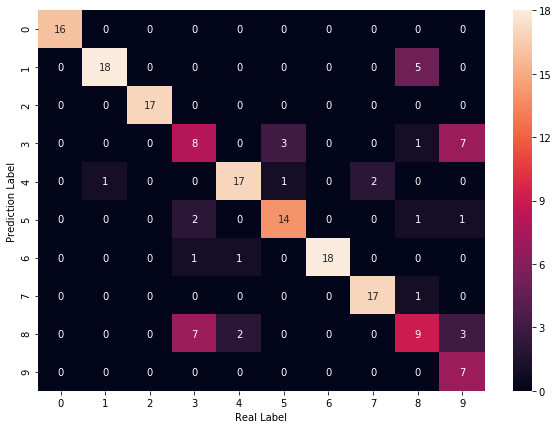

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:14 index:[5] real:5
#1 min_error:14 index:[2] real:2
#2 min_error:11 index:[8] real:8
#3 min_error:4 index:[0] real:0
#4 min_error:9 index:[1] real:1
#5 min_error:3 index:[7] real:7
#6 min_error:3 index:[6] real:6
#7 min_error:11 index:[3] real:3
#8 min_error:3 index:[2] real:2
#9 min_error:9 index:[1] real:1
#10 min_error:11 index:[7] real:7
#11 min_error:10 index:[8] real:4
#12 min_error:3 index:[6] real:6
#13 min_error:11 index:[3] real:3
#14 min_error:10 index:[1] real:1
#15 min_error:12 index:[3] real:3
#16 min_error:11 index:[8] real:9
#17 min_error:8 index:[1] real:1
#18 min_error:8 index:[7] real:7
#19 min_error:2 index:[6] real:6
#20 min_error:8 index:[8] real:8
#21 min_error:3 index:[4] real:4
#22 min_error:9 index:[3] real:3
#23 min_error:13 index:[1 4] real:1
#24 min_error:7 index:[4] real:4
#25 min_error:3 index:[0] real:0
#26 min_error:8 index:[5] real:5
#27 min_error:9 index:[3] real:3
#28 min_error:8 index:[6] real:6
#29 min_error:8 index:[3] real:9
#30 min

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
np.mean(winner_fitness)

0.828557685700543

In [17]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.08333333333333333
Accuracy on training set: 0.15
Accuracy on training set: 0.2777777777777778
Accuracy on training set: 0.34444444444444444
Accuracy on training set: 0.3333333333333333
Accuracy on training set: 0.37222222222222223
Accuracy on training set: 0.4722222222222222
Accuracy on training set: 0.4777777777777778
Accuracy on training set: 0.5111111111111111
Accuracy on training set: 0.4666666666666667
Accuracy on training set: 0.48333333333333334
Accuracy on training set: 0.5111111111111111
Accuracy on training set: 0.55
Accuracy on training set: 0.5944444444444444
Accuracy on training set: 0.6277777777777778
Accuracy on training set: 0.6166666666666667
Accuracy on training set: 0.6444444444444445
Accuracy on training set: 0.6777777777777778
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6944444444444444
Accuracy on training set: 0.7055555555555556
Accuracy on training set: 0.7166666666666667
Accuracy on training set: 0.722222

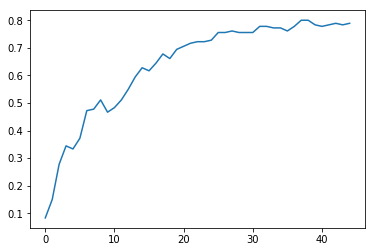

In [18]:
plt.plot(range(45),list_acc)
plt.show()

In [19]:
list_acc

[0.08333333333333333,
 0.15,
 0.2777777777777778,
 0.34444444444444444,
 0.3333333333333333,
 0.37222222222222223,
 0.4722222222222222,
 0.4777777777777778,
 0.5111111111111111,
 0.4666666666666667,
 0.48333333333333334,
 0.5111111111111111,
 0.55,
 0.5944444444444444,
 0.6277777777777778,
 0.6166666666666667,
 0.6444444444444445,
 0.6777777777777778,
 0.6611111111111111,
 0.6944444444444444,
 0.7055555555555556,
 0.7166666666666667,
 0.7222222222222222,
 0.7222222222222222,
 0.7277777777777777,
 0.7555555555555555,
 0.7555555555555555,
 0.7611111111111111,
 0.7555555555555555,
 0.7555555555555555,
 0.7555555555555555,
 0.7777777777777778,
 0.7777777777777778,
 0.7722222222222223,
 0.7722222222222223,
 0.7611111111111111,
 0.7777777777777778,
 0.8,
 0.8,
 0.7833333333333333,
 0.7777777777777778,
 0.7833333333333333,
 0.7888888888888889,
 0.7833333333333333,
 0.7888888888888889]

In [20]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8676561533704391
Avg Base Learner:0.828557685700543
